# Final exam DSE 200

Your task in this take-home exam is to analyze the evolution of poverty, 
income distribution and investment in education in the United States.

### Data source: 

https://www.census.gov/programs-surveys/saipe/data/datasets.All.html

Use the given code snippet to access the data files

The data fields are described here (in File Layout):https://www.census.gov/data/datasets/2015/demo/saipe/2015-state-and-county.html 
Extract the required fields. The required fields are: 
   'State FIPS', 'County FIPS','Poverty Estimate All Ages', 'Poverty Percent All Ages', 
   'Poverty Estimate Under Age 18', 'Poverty Percent Under Age 18', 'Poverty Estimate Ages 5-17', 
   'Poverty Percent Ages 5-17', 'Median Household Income','Name','Postal'
 
### Pandas Data-Frames

1)
    - create a data frame with just the country-wide data
    - create a data frame with just the data of the states
    - create a data frame with just the data of the counties

    
2) Plot a graph of 'Poverty Percent All Ages' of the entire country vs year (line graph).
   Plot a graph of 'Median Household Income' of the entire country vs year (line graph)

3) Plot the total poverty in each state across the years and compare it with the country-wide poverty

4) Plot county-wide poverty stats

- Create a dataframe with the Unique FIPS code (obtained by combining the state and county FIPS), 'Poverty Percent All Ages' in every county in 2001, 'Poverty Percent All Ages' in every county in 2015 and the change ratio between 2001 and 2015. (change ratio = poverty % in 2015 / poverty % in 2001. Divide this by the nationwide change ratio for normalization. A value > 1 indicates that poverty change is higher compared to the nation-wide poverty change and a value < 1 indicates that poverty change is lower compared to the nationwide poverty change.)


FIPS code is a unique code to identify counties and states in the US. In this data you have been given state code and county code separately. You will have to combine the state code and the county code to generate a unique code for each place, which will be used to plot on the map. Please note that before combining, make sure the state code is 2 digits and county code is 3 digits by adding zeroes to the front.


- Plot the 'Poverty Percent All Ages' for each county on the map for the years 2001 and 2015.
- Plot the normalized change ratio on the map.
- Find the counties which witnessed the most positive and most negative change in poverty,

For this visualization, we will use a library called Vincent, which lets you plot data for places using their FIPS code instead of using latitude/longitude. 

To install vincent do
`pip install vincent` or `conda install vincent`


To use it in the notebook and display the maps inside the notebook do

`import vincent`

`vincent.core.initialize_notebook()`

You can find further details about how to use it here - http://wrobstory.github.io/2013/10/mapping-data-python.html and https://github.com/wrobstory/vincent

Before closing your notebook, please clear the output of the vincent maps as it becomes difficult of reload the notebook later. For plotting the counties on the map, you will need to use the file us_counties.topo.json present in the exam folder.

Tips: -  
    Check the type of datafields before operating on them. It will also help you debug for errors.
    Clean the data before using it. Drop those rows before using them.

In [ ]:
import urllib2

urls = ['https://www2.census.gov/programs-surveys/saipe/datasets/2001/2001-state-and-county/est01all.dat',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2002/2002-state-and-county/est02all.dat',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2003/2003-state-and-county/est03all.dat',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2004/2004-state-and-county/est04all.txt',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2005/2005-state-and-county/est05all.txt',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2006/2006-state-and-county/est06all.txt',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2007/2007-state-and-county/est07all.txt',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2008/2008-state-and-county/est08all.txt',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2009/2009-state-and-county/est09all.txt',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2010/2010-state-and-county/est10all.txt',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2011/2011-state-and-county/est11all.txt',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2012/2012-state-and-county/est12all.txt',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2013/2013-state-and-county/est13all.txt',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2014/2014-state-and-county/est14all.txt',
        'https://www2.census.gov/programs-surveys/saipe/datasets/2015/2015-state-and-county/est15all.txt']

year_dic = {} # dictionary to hold the raw data from each year where year is key

def getUrl(urls):
    year = 2001
    for url in urls:
        response = urllib2.urlopen(url)
        lines = response.read().split('\n')
        del lines[-1]
        #TODO -code to use the text data
        year_dic[year] = lines
        year += 1
        
getUrl(urls)
# at this point year_dic is populated with 15 years

In [ ]:
len(year_dic) # should be 15

### Q1: Create the dataframes

Download and parse the data files and create the following three pandas dataframes: (your dataframes should have data in the format shown below)

 * US_stat: statistics for the whole United States.
 * states_stat: Statistics for each state.
 * county_stat: Statistics for each county.

In [ ]:
import pandas as pd

In [ ]:
us_list = []
alist = []
for year in range(2001,2016):
    val = year_dic[year] #is the years value from URL raw

    for i in range(len(val)):
        state_fips  = str.strip(val[i][0:2])
        county_fips = str.strip(val[i][3:6])
        # for #4 we want to create 5 digit FIP code
        while len(county_fips) < 3:
            county_fips = '0' + county_fips
            
        fips = state_fips + county_fips
        
        dic = { 'Year': year, 
               'State FIPS': state_fips, 
               'County FIPS': county_fips,
               'FIPS' : fips,
               'Poverty Estimate All Ages': str.strip(val[i][7:15]),
               'Poverty Percent All Ages': str.strip(val[i][34:38]), 
               'Poverty Estimate Under Age 18': str.strip(val[i][49:57]),
               'Poverty Percent Under Age 18': str.strip(val[i][76:80]),
               'Poverty Estimate Ages 5-17': str.strip(val[i][91:99]),
               'Poverty Percent Ages 5-17': str.strip(val[i][118:122]),
               'Median Household Income': str.strip(val[i][133:139]),
               'Name': str.strip(val[i][193:238]),
               'Postal': str.strip(val[i][239:241]) 
              }
        alist.append(dic)
            
    adf = pd.DataFrame(alist) #state and county df

In [ ]:
# want these columns to be numeric and if not then set to nan
adf['Poverty Estimate All Ages'] = pd.to_numeric(adf['Poverty Estimate All Ages'], errors='coerce')
adf['Poverty Percent All Ages'] = pd.to_numeric(adf['Poverty Percent All Ages'], errors='coerce')
adf['Poverty Estimate Under Age 18'] = pd.to_numeric(adf['Poverty Estimate Under Age 18'], errors='coerce')
adf['Poverty Percent Under Age 18'] = pd.to_numeric(adf['Poverty Percent Under Age 18'], errors='coerce')
adf['Poverty Estimate Ages 5-17'] = pd.to_numeric(adf['Poverty Estimate Ages 5-17'], errors='coerce')
adf['Poverty Percent Ages 5-17'] = pd.to_numeric(adf['Poverty Percent Ages 5-17'], errors='coerce')
adf['Median Household Income'] = pd.to_numeric(adf['Median Household Income'], errors='coerce')

In [ ]:
adf[adf.isnull().any(axis=1)] # lets check which rows contains nulls

In [ ]:
#we can see above there are some nan values for Kalawao County, for the sake of this analysis lets drop these values
adf.dropna(axis=0, how='any', inplace=True)
print(len(adf[adf.isnull().any(axis=1)]))

In [ ]:
adf.dtypes

In [ ]:
US_stat = adf[adf['State FIPS'] == '00']
adf2 = adf[adf['State FIPS'] != '00'] # state and county only
states_stat = adf2[adf2['County FIPS'] == '000']
county_stat = adf2[adf2['County FIPS'] != '000']

In [ ]:
US_stat.head()

In [ ]:
states_stat.head()

In [ ]:
county_stat.head()

In [ ]:
%pylab inline
import matplotlib.pyplot as plt

### Q2. Plot the US-wide statistics on poverty.

Plot the 'Poverty Percent All Ages' and 'Median Household Income' across entire US over the years. 

Compute the percentage of increase in poverty in the US between 2001 and 2015. - [poverty % in 2015] / [poverty % in 2001]

![income_and_poverty](income_and_poverty.png)

In [ ]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(2,2,1)
ax.set_xticks(US_stat['Year'])
ax.set_title('Median Household Income')
ax.set_xticklabels(US_stat['Year'], rotation=45)
ax.grid()
#ax.set_yticks(US_stat['Median Household Income'])
ax.plot(US_stat['Year'],US_stat['Median Household Income'])

ax2 = fig.add_subplot(2,2,2)
ax2.set_xticks(US_stat['Year'])
ax2.set_xticklabels(US_stat['Year'], rotation=45)
ax2.set_title('Poverty Percent All Ages')
ax2.grid()
#ax.set_yticks(US_stat['Median Household Income'])
ax2.plot(US_stat['Year'],US_stat['Poverty Percent All Ages'])

In [ ]:
# Compute the percentage of increase in poverty in the US between 2001 and 2015.
# - [poverty % in 2015] / [poverty % in 2001]
pov_percent_2015 = US_stat.loc[US_stat["Year"] == 2015,'Poverty Percent All Ages'].iloc[0]
pov_percent_2001 = US_stat.loc[US_stat["Year"] == 2001,'Poverty Percent All Ages'].iloc[0]
usa_percent_increase = pov_percent_2015 / pov_percent_2001
print("{0} increase in poverty in the US between 2001 and 2015".format(usa_percent_increase))
print("(same as saying 25.6 % increase)")

### Q3: Plot the change in poverty percentages by state.

For each state, plot the poverty levels across time and compare it with the nation-wide poverty level. Produce a graph similar to the ones below.
![state-wise](state-wise.png)

In [ ]:
state_list = states_stat['Postal'].unique()
state_list.sort()

In [ ]:
nrows=11; ncols=5;
fig, axes = plt.subplots(nrows, ncols, sharex='col', sharey='row',figsize=[11,20])

i=0
while i < len(state_list):
    ax=axes[i/ncols,i%ncols]
    # need to get state specific
    state_df = states_stat[states_stat['Postal'] == state_list[i]].sort_values(['Year'])
    
    ax.plot(state_df['Year'] - 2000, state_df['Poverty Percent All Ages'], 'r')
    ax.plot(US_stat['Year'] - 2000, US_stat['Poverty Percent All Ages'])
    
    ax.set_title(state_list[i])
    ax.grid()
    i+=1

<img src="StateByStateFig.png">

### Q4: plot poverty statistics by county

Using the vincent library and the dataframe `county_stat`, generate the following three maps.

1. Overall percentage of poverty for each county in 2001.
![poverty2001](Poverty2001.png)
1. Overall percentage of poverty for each county in 2015.
![poverty2015](Poverty2015.png)
1. Ratio between percentage of change in poverty from 2001 to 2015 for each county. Divided by the nation-wide change in poverty (1.26).
![povertyChange](PovertyChange.png)

4) Plot county-wide poverty stats

- Create a dataframe with the Unique FIPS code (obtained by combining the state and county FIPS), 'Poverty Percent All Ages' in every county in 2001, 'Poverty Percent All Ages' in every county in 2015 and the change ratio between 2001 and 2015. (change ratio = poverty % in 2015 / poverty % in 2001. Divide this by the nationwide change ratio for normalization. A value > 1 indicates that poverty change is higher compared to the nation-wide poverty change and a value < 1 indicates that poverty change is lower compared to the nationwide poverty change.)


FIPS code is a unique code to identify counties and states in the US. In this data you have been given state code and county code separately. You will have to combine the state code and the county code to generate a unique code for each place, which will be used to plot on the map. Please note that before combining, make sure the state code is 2 digits and county code is 3 digits by adding zeroes to the front.

In [ ]:
bdf = county_stat.loc[:,['FIPS', 'Name', 'Postal', 'Poverty Percent All Ages', 'Year']]
bdf_2001 = bdf[bdf['Year'] == 2001]
bdf_2015 = bdf[bdf['Year'] == 2015]
bdf_2001.columns = ['FIPS', 'Name', 'Postal', '2001-Poverty Percent All Ages', 'Year']
bdf_2015.columns = ['FIPS', 'Name', 'Postal', '2015-Poverty Percent All Ages', 'Year']
del bdf_2001['Year']
del bdf_2015['Year']
cdf_2015 = bdf_2015.set_index(['FIPS', 'Name', 'Postal'])
cdf_2001 = bdf_2001.set_index(['FIPS', 'Name', 'Postal'])
d_df = cdf_2001.join(cdf_2015)
d_df['change_ratio'] = d_df['2015-Poverty Percent All Ages'] / d_df['2001-Poverty Percent All Ages']
d_df['change_ratio_normalized'] = d_df['change_ratio'] / usa_percent_increase
d_df.reset_index(inplace=True)
# need to convert FIPS back to int
d_df['FIPS'] = d_df['FIPS'].astype('int')
d_df.head()

In [ ]:
import vincent
vincent.core.initialize_notebook()


In [ ]:
county_topo = r'us_counties.topo.json'

In [ ]:
#Plot the 'Poverty Percent All Ages' for each county on the map for the years 2001 and 2015.
geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = vincent.Map(data=d_df, geo_data=geo_data, scale=900,
                  projection='albersUsa', data_bind='2001-Poverty Percent All Ages',
                  data_key='FIPS', map_key={'counties': 'properties.FIPS'})
vis.rebind(column='2001-Poverty Percent All Ages', brew='YlGnBu')
vis.scales[0].type='threshold'
vis.scales['color'].domain = [0, 6, 10, 12, 14, 16, 18, 20, 30]
vis.legend(title='Poverty 2001 (%)')
vis.to_json('vega.json')
vis.display()

In [ ]:
vis.rebind(column='2015-Poverty Percent All Ages', brew='YlGnBu')
vis.scales[0].type='threshold'
vis.scales['color'].domain = [0, 6, 10, 12, 14, 16, 18, 20, 30]
vis.legends[0].title = 'Poverty 2015 (%)'
vis.to_json('vega.json')
vis.display()

In [ ]:
#Plot the normalized change ratio on the map.
vis.rebind(column='change_ratio_normalized', brew='RdBu')
vis.scales[0].type='threshold'
vis.scales['color'].domain = [0, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
vis.legends[0].title = 'Change in poverty percentage, relative to national average '
vis.to_json('vega.json')
vis.display()

### Q5: Identify the extremes.
Find out which are the counties in which the poverty percentage increased or decreased the most during the period 2001 - 2015.

In [ ]:
#Find the counties which witnessed the most positive and most negative change in poverty,
pov_change_max = d_df['change_ratio'].max()
pov_change_min = d_df['change_ratio'].min()
d_df[d_df['change_ratio'] == pov_change_max]

In [ ]:
d_df[d_df['change_ratio'] == pov_change_min]

McHenry County, IL, witnessed the largest increase in poverty, from 3.4% in 2001 to 8.1% in 2015 (change ratio = 2.38)

Bill County, ND, witnessed the largest decrease in poverty, from 15.8% in 2001 to 7.1 % in 2015(change ratio = 0.440)

## Q6: Public Education Analysis

Download county-level public school finances data ([Individual Unit Tables](https://www.census.gov/data/tables/2005/econ/school-finances/secondary-education-finance.html)) from [here](https://www.census.gov/programs-surveys/school-finances/data/tables.html) for year 2003-2015*.

*: The format for data files 2001-2002 is somewhat different. You can include these files too if you want.

### Fields
* CONUM: FIPS (This field is in different formats for different years. You'll have to make required chenges to read.)
* TOTALREV: Total Revenue for primary and secondary schools
* TFEDREV: Total federal revenue
* TSTREV: Total state revenue
* TLOCREV: Total local revenue
* TOTALEXP: Total expenditure

[Full Documentation](https://www2.census.gov/programs-surveys/school-finances/tables/2015/secondary-education-finance/school15doc.pdf)

### Your task

Your task in this section is to show whether or not counties that invested more than average in education have seen a significant decrease in poverty in later years, as compared with counties which invested less than average.

It is an open-ended task. We are looking to see whether you can visualize the data and identify trends.

In [26]:
#http://www2.census.gov/programs-surveys/school-finances/tables/2006/secondary-education-finance/elsec06t.xls'
df_list = []
for year in range(2003,2016):
    year_suffix = str(year)[-2:]
    url = 'http://www2.census.gov/programs-surveys/school-finances/tables/' + str(year) \
    + '/secondary-education-finance/elsec' + str(year_suffix) + 't.xls'
    print(url)
    df = pd.read_excel(url)
    df['Year'] = year
    df_list.append(df)

http://www2.census.gov/programs-surveys/school-finances/tables/2003/secondary-education-finance/elsec03t.xls
http://www2.census.gov/programs-surveys/school-finances/tables/2004/secondary-education-finance/elsec04t.xls
http://www2.census.gov/programs-surveys/school-finances/tables/2005/secondary-education-finance/elsec05t.xls
http://www2.census.gov/programs-surveys/school-finances/tables/2006/secondary-education-finance/elsec06t.xls
http://www2.census.gov/programs-surveys/school-finances/tables/2007/secondary-education-finance/elsec07t.xls
http://www2.census.gov/programs-surveys/school-finances/tables/2008/secondary-education-finance/elsec08t.xls
http://www2.census.gov/programs-surveys/school-finances/tables/2009/secondary-education-finance/elsec09t.xls
http://www2.census.gov/programs-surveys/school-finances/tables/2010/secondary-education-finance/elsec10t.xls
http://www2.census.gov/programs-surveys/school-finances/tables/2011/secondary-education-finance/elsec11t.xls
http://www2.census.

In [27]:
#remove starting 0 for some CONUM values such as 01001 to 1001 so all consistent
for adf in df_list:
    adf['CONUM'] = df['CONUM'].apply(lambda x: str(x)[1:] if str(x)[0] == '0' else str(x))
    adf['CONUM'] = df['CONUM'].astype('int')

In [28]:
# This creates a full dataframe from list of dataframes from each year
school_df = pd.concat(df_list)
school_df = school_df.rename(columns = {'NAME':'SCHOOL_DISTRICT_NAME'})
print(school_df.shape)
school_df.head()

(192311, 67)


,CBSA,CONUM,CSA,DEBTOUT,ENROLL,FEDRCOMP,FEDRNUTR,FEDROTHR,FEDRSPEC,IDCENSUS,...,TEMPBENE,TFEDREV,TINTRST,TLOCREV,TOTALEXP,TOTALREV,TPAYOTH,TSALWAGE,TSTREV,Year
0,33860,1001.0,0,36997,8940,1122,1498,713,1155,1500100100000,...,8626,4488,2305,14737,52431,55694,77,30405,36469,2003
1,19300,1003.0,380,84405,23411,2836,3081,2293,3476,1500200100000,...,27776,11686,2710,71405,172634,166133,11,99300,83042,2003
2,0,1005.0,0,5171,1483,841,618,446,274,1500300100000,...,1902,2179,163,1785,11070,11327,2,6463,7363,2003
3,0,1005.0,0,0,2883,756,746,547,375,1500300200000,...,3381,2424,0,5633,18986,20116,5,11557,12059,2003
4,13820,1007.0,142,7661,3600,970,960,922,691,1500400100000,...,4035,3543,307,3237,23155,23418,3,14079,16638,2003


In [29]:
# I want to drop any school districts where enrollment is zero or idcensus is zero to make analysis easier
to_drop = list(school_df[school_df['ENROLL'] == 0]['IDCENSUS']) + list(school_df[school_df['TOTALEXP'] == 0]['IDCENSUS'])
#print(to_drop)
school_df = school_df[~school_df['IDCENSUS'].isin(to_drop)]
# want to add AVERAGE SPENT FOR ENROLLED STUDENT
school_df.head()

,CBSA,CONUM,CSA,DEBTOUT,ENROLL,FEDRCOMP,FEDRNUTR,FEDROTHR,FEDRSPEC,IDCENSUS,...,TEMPBENE,TFEDREV,TINTRST,TLOCREV,TOTALEXP,TOTALREV,TPAYOTH,TSALWAGE,TSTREV,Year
0,33860,1001.0,0,36997,8940,1122,1498,713,1155,1500100100000,...,8626,4488,2305,14737,52431,55694,77,30405,36469,2003
1,19300,1003.0,380,84405,23411,2836,3081,2293,3476,1500200100000,...,27776,11686,2710,71405,172634,166133,11,99300,83042,2003
2,0,1005.0,0,5171,1483,841,618,446,274,1500300100000,...,1902,2179,163,1785,11070,11327,2,6463,7363,2003
3,0,1005.0,0,0,2883,756,746,547,375,1500300200000,...,3381,2424,0,5633,18986,20116,5,11557,12059,2003
4,13820,1007.0,142,7661,3600,970,960,922,691,1500400100000,...,4035,3543,307,3237,23155,23418,3,14079,16638,2003


In [30]:
sub_school_df = school_df.loc[:,['CONUM', 'SCHOOL_DISTRICT_NAME', 'ENROLL', 'TOTALREV', 'TFEDREV', 'TSTREV', 'TLOCREV', 'TOTALEXP', 'Year']]
sub_school_df.head()

,CONUM,SCHOOL_DISTRICT_NAME,ENROLL,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,Year
0,1001.0,AUTAUGA CO SCH DIST,8940,55694,4488,36469,14737,52431,2003
1,1003.0,BALDWIN CO SCH DIST,23411,166133,11686,83042,71405,172634,2003
2,1005.0,BARBOUR CO SCH DIST,1483,11327,2179,7363,1785,11070,2003
3,1005.0,EUFAULA CTY SCH DIST,2883,20116,2424,12059,5633,18986,2003
4,1007.0,BIBB CO SCH DIST,3600,23418,3543,16638,3237,23155,2003


In [31]:
#we really want to group by the CONUM (FIPS) and take the sum as that will give a sum number of all the school
#districts within a county
summed_df = sub_school_df.groupby(['CONUM', 'Year']).sum()
# we want to calculate the totalExp per enrollment numbers
summed_df['SPENT_PER_ENROLLED'] = summed_df['TOTALEXP'] / summed_df['ENROLL']
summed_df.head()

ENROLL  TOTALREV  TFEDREV  TSTREV  TLOCREV  TOTALEXP  \
CONUM  Year                                                         
1001.0 2003    8940     55694     4488   36469    14737     52431   
       2004    9105     57121     5141   37190    14790     55179   
       2005    9200     61748     5573   40508    15667     59863   
       2006    9559     65282     5998   43433    15851     66157   
       2007    9652     72861     5764   50400    16697     73885   

             SPENT_PER_ENROLLED  
CONUM  Year                      
1001.0 2003            5.864765  
       2004            6.060297  
       2005            6.506848  
       2006            6.920912  
       2007            7.654890

I want to compare the the education investment 2003-2015 to the poverty change ratio calculated earlier
from 2001-2015

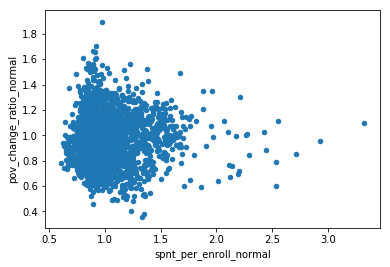

In [32]:
# I want to look at the averages for time period 2003-2015
df = summed_df.reset_index()
mean_df = df.groupby('CONUM').mean()
del mean_df['Year'] #when dealing with mean year does not make sense
mean_df = mean_df.rename(columns = {'SPENT_PER_ENROLLED':'AVG_SPENT_PER_ENROLLED_PER_YEAR'})
mean_enroll = mean_df['AVG_SPENT_PER_ENROLLED_PER_YEAR'].mean()
# now we want to join the school_df with the county poverty info to make things easier
afull_df = pd.merge(mean_df.reset_index(), d_df, left_on = 'CONUM', right_on = 'FIPS')
afull_df.head()
afull_df = afull_df.rename(columns = {'change_ratio_normalized':'pov_change_ratio_normal'})
# divide by mean so that way < 1 means county spend less than average per enrolled and > 1 vice versa
afull_df['spnt_per_enroll_normal'] = afull_df['AVG_SPENT_PER_ENROLLED_PER_YEAR'] / mean_enroll
analysis_df2 = afull_df.loc[:, ['CONUM', 'Name', 'Postal',
                              'pov_change_ratio_normal', 'spnt_per_enroll_normal'] ]
analysis_df2.head()
analysis_df2.plot(x='spnt_per_enroll_normal', y='pov_change_ratio_normal', kind='scatter' )

In [33]:
analysis_df2.corr()

,pov_change_ratio_normal,spnt_per_enroll_normal
pov_change_ratio_normal,1.000000,-0.003008
spnt_per_enroll_normal,-0.003008,1.000000


from the plot and correlation shown above we do not see any correlation between investing 
in education between 2001-2015 and poverty change between 2003-2015 for counties

In [34]:
# I want to look at the averages for time period 2003-2008 
df2 = summed_df.query('Year < 2009').reset_index()
mean_df = df2.groupby('CONUM').mean()
del mean_df['Year'] #when dealing with mean year does not make sense
mean_df = mean_df.rename(columns = {'SPENT_PER_ENROLLED':'AVG_SPENT_PER_ENROLLED_PER_YEAR_03_08'})
mean_df.head()
# now we want to join the school_df with the county poverty info to make things easier
full_df = pd.merge(mean_df.reset_index(), d_df, left_on = 'CONUM', right_on = 'FIPS')
full_df.head()

,CONUM,ENROLL,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,AVG_SPENT_PER_ENROLLED_PER_YEAR_03_08,FIPS,Name,Postal,2001-Poverty Percent All Ages,2015-Poverty Percent All Ages,change_ratio,change_ratio_normalized
0,1001,9384.666667,66082.833333,5482.500000,44451.166667,16149.166667,65022.500000,6.898971,1001,Autauga County,AL,10.8,12.7,1.175926,0.935941
1,1003,25107.833333,223553.833333,16254.500000,104539.166667,102760.166667,254309.166667,10.021361,1003,Baldwin County,AL,11.1,12.9,1.162162,0.924986
2,1005,4184.500000,33785.000000,5220.500000,20646.833333,7917.666667,34019.666667,8.174801,1005,Barbour County,AL,24.2,32.0,1.322314,1.052454
3,1007,3546.000000,28631.666667,3829.833333,20326.666667,4475.166667,29459.666667,8.312493,1007,Bibb County,AL,18.2,22.2,1.219780,0.970845
4,1009,9288.166667,68611.000000,5924.333333,47519.833333,15166.833333,68057.166667,7.291489,1009,Blount County,AL,13.6,14.7,1.080882,0.860294


In [35]:
mean_df.mean()

ENROLL                                    14788.999370
TOTALREV                                 155518.431861
TFEDREV                                   12844.939703
TSTREV                                    73175.019500
TLOCREV                                   69498.472658
TOTALEXP                                 158792.392990
AVG_SPENT_PER_ENROLLED_PER_YEAR_03_08        10.993220
dtype: float64

In [36]:
mean_enroll_03_08 = mean_df['AVG_SPENT_PER_ENROLLED_PER_YEAR_03_08'].mean()

So we can see that the average spent per enrolled student per year over years 2003-2008 is 10.99 when taking into account all counties

In [37]:
# we want the change_ratio_normalized poverty stats for 2009-2015
tdf = county_stat.loc[:,['FIPS', 'Name', 'Postal', 'Poverty Percent All Ages', 'Year']]
tdf_2009 = tdf[tdf['Year'] == 2009]
tdf_2015 = tdf[tdf['Year'] == 2015]
tdf_2009.columns = ['FIPS', 'Name', 'Postal', '2009-Poverty Percent All Ages', 'Year']
tdf_2015.columns = ['FIPS', 'Name', 'Postal', '2015-Poverty Percent All Ages', 'Year']
del tdf_2009['Year']
del tdf_2015['Year']
ttdf_2015 = tdf_2015.set_index(['FIPS', 'Name', 'Postal'])
ttdf_2009 = tdf_2009.set_index(['FIPS', 'Name', 'Postal'])
ttdf = ttdf_2009.join(ttdf_2015)
ttdf['change_ratio_09_15'] = ttdf['2015-Poverty Percent All Ages'] / ttdf['2009-Poverty Percent All Ages']
pov_percent_2015 = US_stat.loc[US_stat["Year"] == 2015,'Poverty Percent All Ages'].iloc[0]
pov_percent_2009 = US_stat.loc[US_stat["Year"] == 2009,'Poverty Percent All Ages'].iloc[0]
usa_2009_2015_perc_increase = pov_percent_2015 / pov_percent_2009
ttdf['change_ratio_normalized_09_15'] = ttdf['change_ratio_09_15'] / usa_2009_2015_perc_increase
ttdf.reset_index(inplace=True)
# need to convert FIPS back to int
ttdf['FIPS'] = ttdf['FIPS'].astype('int')
ttdf.head()

,FIPS,Name,Postal,2009-Poverty Percent All Ages,2015-Poverty Percent All Ages,change_ratio_09_15,change_ratio_normalized_09_15
0,1001,Autauga County,AL,11.2,12.7,1.133929,1.103073
1,1003,Baldwin County,AL,13.3,12.9,0.969925,0.943532
2,1005,Barbour County,AL,32.8,32.0,0.975610,0.949063
3,1007,Bibb County,AL,18.1,22.2,1.226519,1.193145
4,1009,Blount County,AL,14.6,14.7,1.006849,0.979452


In [38]:
# now we want to join the school_df with the county poverty info to make things easier
full_df = pd.merge(mean_df.reset_index(), ttdf, left_on = 'CONUM', right_on = 'FIPS')
full_df.head()

,CONUM,ENROLL,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,AVG_SPENT_PER_ENROLLED_PER_YEAR_03_08,FIPS,Name,Postal,2009-Poverty Percent All Ages,2015-Poverty Percent All Ages,change_ratio_09_15,change_ratio_normalized_09_15
0,1001,9384.666667,66082.833333,5482.500000,44451.166667,16149.166667,65022.500000,6.898971,1001,Autauga County,AL,11.2,12.7,1.133929,1.103073
1,1003,25107.833333,223553.833333,16254.500000,104539.166667,102760.166667,254309.166667,10.021361,1003,Baldwin County,AL,13.3,12.9,0.969925,0.943532
2,1005,4184.500000,33785.000000,5220.500000,20646.833333,7917.666667,34019.666667,8.174801,1005,Barbour County,AL,32.8,32.0,0.975610,0.949063
3,1007,3546.000000,28631.666667,3829.833333,20326.666667,4475.166667,29459.666667,8.312493,1007,Bibb County,AL,18.1,22.2,1.226519,1.193145
4,1009,9288.166667,68611.000000,5924.333333,47519.833333,15166.833333,68057.166667,7.291489,1009,Blount County,AL,14.6,14.7,1.006849,0.979452


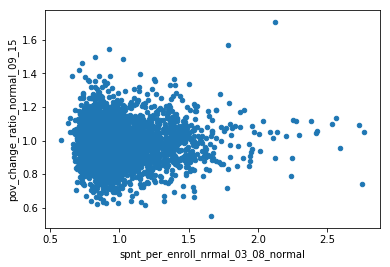

In [39]:
full_df = full_df.rename(columns = {'change_ratio_normalized_09_15':'pov_change_ratio_normal_09_15'})
# divide by mean so that way < 1 means county spend less than average per enrolled and > 1 vice versa
full_df['spnt_per_enroll_nrmal_03_08_normal'] = full_df['AVG_SPENT_PER_ENROLLED_PER_YEAR_03_08'] / mean_enroll_03_08
analysis_df = full_df.loc[:, ['CONUM', 'Name', 'Postal',
                              'pov_change_ratio_normal_09_15', 'spnt_per_enroll_nrmal_03_08_normal'] ]
analysis_df.head()
analysis_df.plot(x='spnt_per_enroll_nrmal_03_08_normal', y='pov_change_ratio_normal_09_15', kind='scatter' )

In [40]:
analysis_df.corr()

,pov_change_ratio_normal_09_15,spnt_per_enroll_nrmal_03_08_normal
pov_change_ratio_normal_09_15,1.000000,0.048332
spnt_per_enroll_nrmal_03_08_normal,0.048332,1.000000


from the plot and correlation shown above we do not see any correlation between investing 
in education between 2003-2008 and poverty change between 2009-2015

In [41]:
# want to make into function to check a bunch of cross sections of avg spending per enrolled vs poverty rates for
# different time ranges

In [42]:
def eduPovCorr(educYear, pov_start_year, pov_end_year):
    query = 'Year < ' + str(educYear)
    print(query)
    # I want to look at the averages for time period
    df2 = summed_df.query(query).reset_index()
    mean_df = df2.groupby('CONUM').mean()
    del mean_df['Year'] #when dealing with mean year does not make sense
    mean_df = mean_df.rename(columns = {'SPENT_PER_ENROLLED':'AVG_SPENT_PER_ENROLLED_PER_YEAR'})
    mean_enroll = mean_df['AVG_SPENT_PER_ENROLLED_PER_YEAR'].mean()
    # we want the change_ratio_normalized poverty stats from pov_start_year to pov_end_year
    tdf = county_stat.loc[:,['FIPS', 'Name', 'Postal', 'Poverty Percent All Ages', 'Year']]
    tdf_start = tdf[tdf['Year'] == pov_start_year]
    tdf_end = tdf[tdf['Year'] == pov_end_year]
    tdf_start.columns = ['FIPS', 'Name', 'Postal', 'Start-Poverty Percent All Ages', 'Year']
    tdf_end.columns = ['FIPS', 'Name', 'Postal', 'end-Poverty Percent All Ages', 'Year']
    del tdf_start['Year']
    del tdf_end['Year']
    ttdf_end = tdf_end.set_index(['FIPS', 'Name', 'Postal'])
    ttdf_start = tdf_start.set_index(['FIPS', 'Name', 'Postal'])
    ttdf = ttdf_start.join(ttdf_end)
    ttdf['change_ratio'] = ttdf['end-Poverty Percent All Ages'] / ttdf['Start-Poverty Percent All Ages']
    pov_percent_start = US_stat.loc[US_stat["Year"] == pov_start_year,'Poverty Percent All Ages'].iloc[0]
    pov_percent_end = US_stat.loc[US_stat["Year"] == pov_end_year,'Poverty Percent All Ages'].iloc[0]
    usa_range_perc_increase = pov_percent_end / pov_percent_start
    ttdf['change_ratio_normalized'] = ttdf['change_ratio'] / usa_range_perc_increase
    ttdf.reset_index(inplace=True)
    # need to convert FIPS back to int
    ttdf['FIPS'] = ttdf['FIPS'].astype('int')

    # now we want to join the school_df with the county poverty info to make things easier
    full_df = pd.merge(mean_df.reset_index(), ttdf, left_on = 'CONUM', right_on = 'FIPS')

    full_df = full_df.rename(columns = {'change_ratio_normalized':'pov_change_ratio_normal'})
    # divide by mean so that way < 1 means county spend less than average per enrolled and > 1 vice versa
    full_df['spnt_per_enroll_nrmal_normal'] = full_df['AVG_SPENT_PER_ENROLLED_PER_YEAR'] / mean_enroll
    analysis_df = full_df.loc[:, ['CONUM', 'Name', 'Postal',
                                  'pov_change_ratio_normal', 'spnt_per_enroll_nrmal_normal'] ]
    title = " 2003 - {0} Education Spending, Pov Year Range {1} - {2}".format(str(educYear-1),
                                                                              str(pov_start_year),
                                                                              str(pov_end_year))
    analysis_df.plot(x='spnt_per_enroll_nrmal_normal', y='pov_change_ratio_normal', kind='scatter', title=title )
    return analysis_df.corr()
  

Year < 2005


,pov_change_ratio_normal,spnt_per_enroll_nrmal_normal
pov_change_ratio_normal,1.000000,-0.006608
spnt_per_enroll_nrmal_normal,-0.006608,1.000000


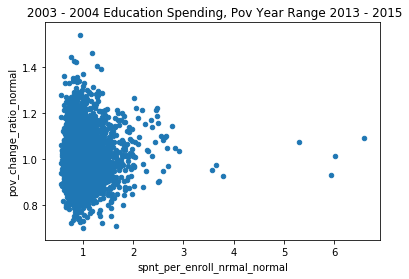

In [43]:
#this is for education spending 2003 - 2004 vs poverty change 2013-2015
educYearMax, pov_start_year, pov_end_year = 2005,2013,2015 
eduPovCorr(educYearMax, pov_start_year, pov_end_year)

Year < 2009


,pov_change_ratio_normal,spnt_per_enroll_nrmal_normal
pov_change_ratio_normal,1.000000,0.006295
spnt_per_enroll_nrmal_normal,0.006295,1.000000


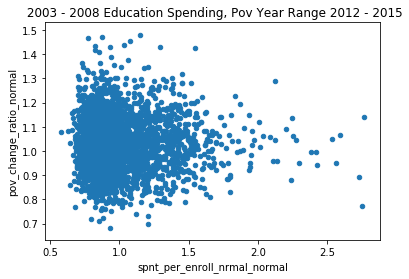

In [44]:
#this is for education spending 2003 - 2004 vs poverty change 2013-2015
educYearMax, pov_start_year, pov_end_year = 2009,2012,2015 
eduPovCorr(educYearMax, pov_start_year, pov_end_year)

as we can see there is not even close to a correlation, even when trying different year ranges

Lets try looking at a different column from school district data that looks interesting - PER PUPIL - TOTAL CURRENT SPENDING 

In [45]:
school_df.head()
sub_school_df = school_df.loc[:,['CONUM', 'SCHOOL_DISTRICT_NAME', 'PPCSTOT', 'Year']]
#we want to take the mean for PPCSTOT
summed_df2 = sub_school_df.groupby(['CONUM', 'Year']).mean()


In [46]:
# this will test the correlation for PPCSTOT (Spending per Pupil) vs poverty
def eduPovCorrPPCSTOT(educYear, pov_start_year, pov_end_year):
    sub_school_df = school_df.loc[:,['CONUM', 'SCHOOL_DISTRICT_NAME', 'PPCSTOT', 'Year']]
    #we want to take the mean for PPCSTOT
    summed_df2 = sub_school_df.groupby(['CONUM', 'Year']).mean()
    query = 'Year < ' + str(educYear)
    print(query)
    # I want to look at the averages for time period
    df2 = summed_df2.query(query).reset_index()
    mean_df = df2.groupby('CONUM').mean()
    del mean_df['Year'] #when dealing with mean year does not make sense
    mean_df = mean_df.rename(columns = {'PPCSTOT':'PPCSTOT_PER_YEAR'})
    mean_ppcstot = mean_df['PPCSTOT_PER_YEAR'].mean()
    # we want the change_ratio_normalized poverty stats from pov_start_year to pov_end_year
    tdf = county_stat.loc[:,['FIPS', 'Name', 'Postal', 'Poverty Percent All Ages', 'Year']]
    tdf_start = tdf[tdf['Year'] == pov_start_year]
    tdf_end = tdf[tdf['Year'] == pov_end_year]
    tdf_start.columns = ['FIPS', 'Name', 'Postal', 'Start-Poverty Percent All Ages', 'Year']
    tdf_end.columns = ['FIPS', 'Name', 'Postal', 'end-Poverty Percent All Ages', 'Year']
    del tdf_start['Year']
    del tdf_end['Year']
    ttdf_end = tdf_end.set_index(['FIPS', 'Name', 'Postal'])
    ttdf_start = tdf_start.set_index(['FIPS', 'Name', 'Postal'])
    ttdf = ttdf_start.join(ttdf_end)
    ttdf['change_ratio'] = ttdf['end-Poverty Percent All Ages'] / ttdf['Start-Poverty Percent All Ages']
    pov_percent_start = US_stat.loc[US_stat["Year"] == pov_start_year,'Poverty Percent All Ages'].iloc[0]
    pov_percent_end = US_stat.loc[US_stat["Year"] == pov_end_year,'Poverty Percent All Ages'].iloc[0]
    usa_range_perc_increase = pov_percent_end / pov_percent_start
    ttdf['change_ratio_normalized'] = ttdf['change_ratio'] / usa_range_perc_increase
    ttdf.reset_index(inplace=True)
    # need to convert FIPS back to int
    ttdf['FIPS'] = ttdf['FIPS'].astype('int')

    # now we want to join the school_df with the county poverty info to make things easier
    full_df = pd.merge(mean_df.reset_index(), ttdf, left_on = 'CONUM', right_on = 'FIPS')

    full_df = full_df.rename(columns = {'change_ratio_normalized':'pov_change_ratio_normal'})
    # divide by mean so that way < 1 means county spend less than average per PPCSTOT and > 1 vice versa
    full_df['ppcstot_normal'] = full_df['PPCSTOT_PER_YEAR'] / mean_ppcstot
    analysis_df = full_df.loc[:, ['CONUM', 'Name', 'Postal',
                                  'pov_change_ratio_normal', 'ppcstot_normal'] ]
    title = " 2003 - {0} Education Spending Per Pupil, Pov Year Range {1} - {2}".format(str(educYear-1),
                                                                              str(pov_start_year),
                                                                              str(pov_end_year))
    analysis_df.plot(x='ppcstot_normal', y='pov_change_ratio_normal', kind='scatter', title=title )
    return analysis_df.corr()
  

Year < 2009


,pov_change_ratio_normal,ppcstot_normal
pov_change_ratio_normal,1.000000,0.014295
ppcstot_normal,0.014295,1.000000


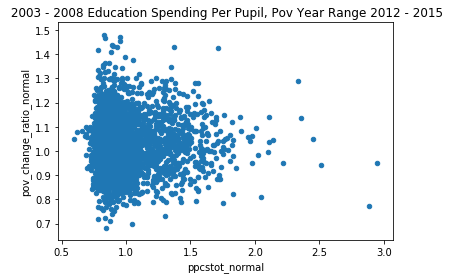

In [47]:
#this is for spending per pupil (PCCSTOT) () 2003 - 2004 vs poverty change 2013-2015
educYearMax, pov_start_year, pov_end_year = 2009,2012,2015 
eduPovCorrPPCSTOT(educYearMax, pov_start_year, pov_end_year)

Year < 2005


,pov_change_ratio_normal,ppcstot_normal
pov_change_ratio_normal,1.000000,-0.005334
ppcstot_normal,-0.005334,1.000000


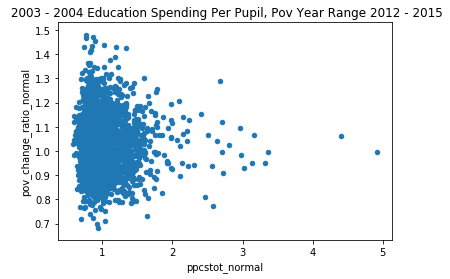

In [48]:
#this is for education spending per pupil (PCCSTOT) 2003 - 2004 vs poverty change 2013-2015
educYearMax, pov_start_year, pov_end_year = 2005,2012,2015 
eduPovCorrPPCSTOT(educYearMax, pov_start_year, pov_end_year)

even using the PPCSTOT information for each county, we do not see any correlation between money spent per pupil for education vs poverty change

Now lets try analyzing the data in a slightly different way

In [49]:
# now lets try analyzing the school data in a diffrent way to see some trends
school_df.head()
s_df = school_df.loc[:,['CONUM', 'SCHOOL_DISTRICT_NAME', 'ENROLL', 'TOTALEXP', 'Year']]
s_df = s_df.groupby(['CONUM', 'Year']).sum()
# we want to calculate the totalExp per enrollment numbers
s_df['SPENT_PER_ENROLLED'] = s_df['TOTALEXP'] / s_df['ENROLL']
s_df = s_df.reset_index()
del s_df['Year']
s_df = s_df.groupby('CONUM').mean()
us_mean = s_df['SPENT_PER_ENROLLED'].mean() #country mean spent per enrolled per year
s_df.loc[s_df.SPENT_PER_ENROLLED > us_mean, 'above_or_below_mean'] = "Above Educ. spend US Average"
s_df.loc[s_df.SPENT_PER_ENROLLED <= us_mean, 'above_or_below_mean'] = "Below Educ. spend US Average"
s_df2 = school_df.loc[:,['CONUM', 'SCHOOL_DISTRICT_NAME', 'ENROLL', 'TOTALEXP', 'Year']].set_index('CONUM')
s_df2 = s_df2.groupby(['CONUM', 'Year']).sum()
# we want to calculate the totalExp per enrollment numbers
s_df2['SPENT_PER_ENROLLED'] = s_df2['TOTALEXP'] / s_df2['ENROLL']
s_df2 = s_df2.reset_index().loc[:, ['CONUM', 'Year']]
sdf_merged = pd.merge(s_df.reset_index(),s_df2, on='CONUM')
county_sdf = county_stat.loc[:,['FIPS', 'Poverty Percent All Ages', 'Year']]
county_sdf['FIPS'] = county_sdf['FIPS'].astype('int')
county_sdf.head()
sdf_merged = pd.merge(sdf_merged, county_sdf, left_on = ['CONUM', 'Year'], right_on = ['FIPS', 'Year'])
sdf_merged = sdf_merged.loc[:, ['CONUM', 'above_or_below_mean', 'Poverty Percent All Ages', 'Year']]
sdf_merged.head()

,CONUM,above_or_below_mean,Poverty Percent All Ages,Year
0,1001,Below Educ. spend US Average,10.4,2003
1,1001,Below Educ. spend US Average,11.6,2004
2,1001,Below Educ. spend US Average,10.4,2005
3,1001,Below Educ. spend US Average,12.5,2006
4,1001,Below Educ. spend US Average,10.4,2007


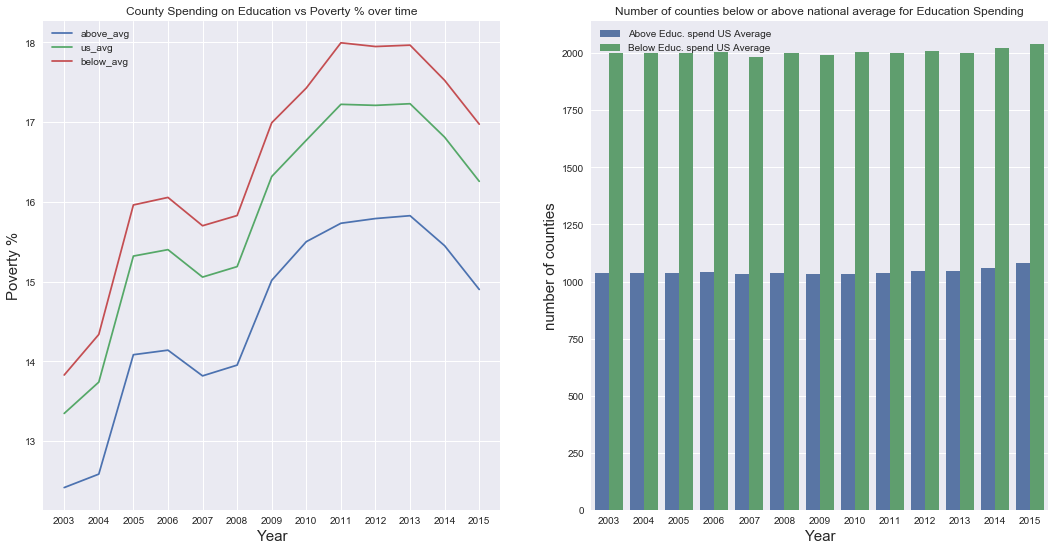

In [50]:
import seaborn as sns
us_avg = sdf_merged.groupby('Year').mean()
us_avg['category'] = "us_avg"
below_avg = sdf_merged.loc[sdf_merged['above_or_below_mean'] == "Below Educ. spend US Average"].groupby('Year').mean()
below_avg['category'] = "below_avg"
above_avg = sdf_merged.loc[sdf_merged['above_or_below_mean'] == "Above Educ. spend US Average"].groupby('Year').mean()
above_avg['category'] = "above_avg"
avg_df = pd.concat([us_avg, below_avg, above_avg])
avg_df.head()

pivoted = pd.pivot_table(avg_df, values='Poverty Percent All Ages', columns='category', index='Year')
# Now there will be an index column for date and value columns for 0,1,2,3,4
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot(1,2,1)
ax.set_xlabel('Year', size=15)
ax.set_ylabel('Poverty %', size=15)
ax.set_xticks(range(2003,2016))
ax.set_title('County Spending on Education vs Poverty % over time')
ax.plot(pivoted['above_avg'])
ax.plot(pivoted['us_avg'])
ax.plot(pivoted['below_avg'])
ax.legend()


sdf_gby_df = sdf_merged.groupby(['Year','above_or_below_mean']).count().reset_index()
sdf_gby_df.head()
ax = fig.add_subplot(1,2,2)
ax.set_title('Number of counties below or above national average for Education Spending')
ax = sns.barplot(x="Year", y="CONUM", hue="above_or_below_mean", data=sdf_gby_df)
ax.set_xlabel('Year', size=15)
ax.set_ylabel('number of counties', size=15)
ax.legend()


from graph above on the left we can see that counties that spend below average on education had higher than average poverty rates over those same years and vice versa. Yet the % change of poverty looks consistent over the years regardless of if the county of a below or above average spender on education.

On the right is just to show that there are actually about twice as many counties that are below the national average
for education spending than there are above the national average interestingly.

### Q6 Summary
After comparing both average total spending per enrolled student and spending per pupil to poverty levels per county,
it was clear that the amount spent on education did not make any significant difference on % change of poverty levels.

 Though I did see an inverse relationship between poverty rate and education spending when splitting counties into below vs above average school spending groups, but no real differences in percent change in poverty of the years for the different groups

Overall, this is not too suprising, there are too many outside variables to control for. For example, even if a better education in a county could help its students become better educated, the better educated students could leave the county for a better paying job in a different county therefore not helping decrease the poverty rate in the county they were educated in.

Also, a larger range of years of the data would help this analyis

## Q6
* Rigor: 2
* Statistical Significance: 2 (You mean the spend but this approach could introduce bias. A better indication is (sum of spend)/(sum of enroll))
* Clear conclusions: 2.5
* Originality: 2.5

# Total = 39